# Visualize Result of PHILHARMONIC Analysis

Lorem ipsum dolor...

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from loguru import logger
from matplotlib import pyplot as plt

from pathlib import Path

from philharmonic.utils import (
    load_cluster_json,
    parse_GO_database,
    parse_GO_map,
    plot_cluster,
    print_cluster,
    write_cluster_cytoscape,
)

In [2]:
# Initial Files
# cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_clusters.json"
# network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_network.positive.tsv"
# go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_GO_map.csv"

# GO_DATABASE = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/go.obo"
# IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/pdam")

# # Initial Files
# cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_clusters.json"
# network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_network.positive.tsv"
# go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_GO_map.csv"

# GO_DATABASE = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/go.obo"
# IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/cgor")

# Initial Files
cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/20240912-dmelaAll-phil_v0.2.0_clusters.json"
network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/20240912-dmelaAll-phil_v0.2.0_network.positive.tsv"
go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/20240912-dmelaAll-phil_v0.2.0_GO_map.csv"
GO_DATABASE = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/go.obo"
IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/dmel")

In [3]:
clusters = load_cluster_json(cluster_file_path)
full_G = nx.read_weighted_edgelist(network_file_path)
go_map = parse_GO_map(go_map_path)
go_database = parse_GO_database(GO_DATABASE)

In [142]:
cluster_graph = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/d_melanogaster/20240913-dmelaAll-phil_v0.2.0/20240912-dmelaAll-phil_v0.2.0_cluster_graph.tsv"
clust_g = nx.read_weighted_edgelist(cluster_graph, delimiter="\t",comments="source")

In [143]:
clust_bc = nx.betweenness_centrality(clust_g, weight="weight")

In [154]:
clust_bc["530243571363821960"]

0.05882442515608345

In [149]:
#sort the clusters by betweenness centrality
sorted_clust = sorted(clust_bc.items(), key=lambda x: x[1], reverse=True)
sorted_clust[:20]

[('1054015116239885685', 0.07163764952709677),
 ('1197721105392347774', 0.07098793631456948),
 ('530243571363821960', 0.05882442515608345),
 ('608177173205655808', 0.04902204625822715),
 ('696609868118743228', 0.04531495863154155),
 ('296333258853077320', 0.03959612879210869),
 ('992025034813156853', 0.03946330981506861),
 ('1454309218749130379', 0.03746764123648545),
 ('1222544155635783311', 0.03627565436610663),
 ('1965075135892167069', 0.035133580359711016),
 ('1009708926696874649', 0.0334280831768269),
 ('559246497594118319', 0.03313198991590952),
 ('1039327081367694716', 0.032815593117100646),
 ('1360180913983040396', 0.032181107557991986),
 ('770970736678474729', 0.030602507486929602),
 ('1174520584425387906', 0.029173646007816863),
 ('1346451422620795471', 0.0290594386071773),
 ('1297003039095414367', 0.027891985178417338),
 ('3234971951557070', 0.027637344974028397),
 ('608282910349369165', 0.026982555877028233)]

---

## Basic Network Statistics

In [13]:
label = ["Nodes", "Edges", "Degree (Med)", "Degree (Avg)", "Sparsity"]
degrees = [i[1] for i in list(full_G.degree())]
value = [
    len(full_G.nodes),
    len(full_G.edges),
    np.median(degrees),
    np.mean(degrees),
    len(full_G.edges()) / len(full_G) ** 2,
]
df = pd.DataFrame([label, value]).T
df.columns = ["", "Network"]
df = df.set_index("")
df

,Network
,
Nodes,4192
Edges,197510
Degree (Med),45.5
Degree (Avg),94.23187
Sparsity,0.011239


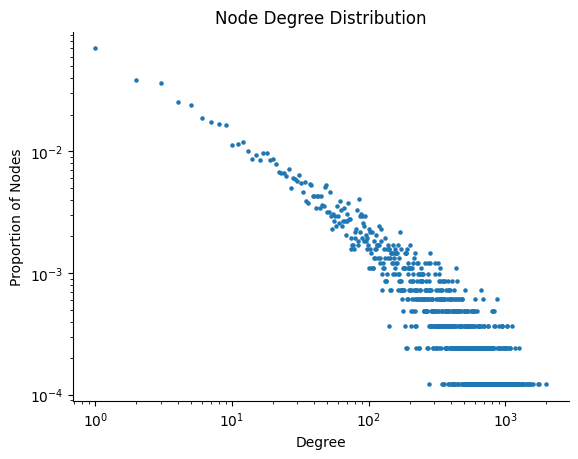

In [15]:
degreeDist = {}
for i in degrees:
    n = degreeDist.setdefault(i, 0)
    degreeDist[i] = n + 1

plt.scatter(degreeDist.keys(), [i / len(full_G) for i in degreeDist.values()], s=5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Proportion of Nodes")
plt.title("Node Degree Distribution")
plt.savefig(IMG_DIR / "degree_distribution.svg", bbox_inches="tight", dpi=300)
sns.despine()

---

## Basic Cluster Statistics

In [14]:
logger.info(f"Number of clusters: {len(clusters)}")

2024-10-18 12:22:11.322 | INFO     | __main__:<module>:1 - Number of clusters: 285


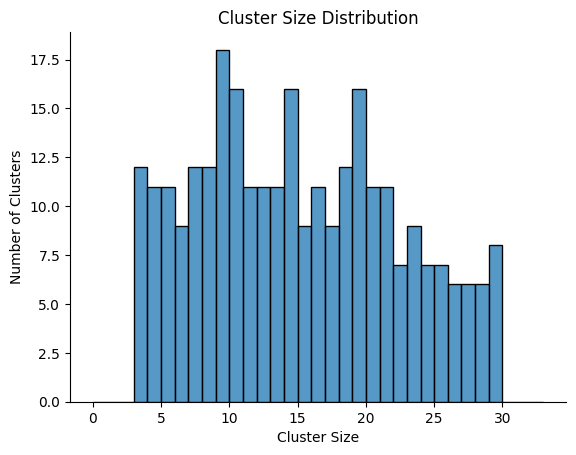

In [15]:
sizes = [len(i["members"]) for i in clusters.values()]
sns.histplot(sizes, bins=np.arange(0, max(sizes) + 5, max(sizes) // 20))
plt.xlabel("Cluster Size")
plt.ylabel("Number of Clusters")
plt.title("Cluster Size Distribution")
sns.despine()
plt.savefig(IMG_DIR / "size_distribution.svg", bbox_inches="tight", dpi=300)
plt.show()

---

## View Individual Clusters

In [4]:
# Coral
# k = "208641124039621440" # sam original
# k = "1495076087230339862" # blue
# k = "1823305451748972384" # green
# k = "889733293002804025" # purple
# k = "363014559509114069" # red
# k = "1238085533603602511" # brown
# k = "803905878821692717" # orange
# k = "1468420370922021553"

# Symbiont
# k = "1986207034231625260" # transmembrane transport process
# k = "159951644591660094" # transmembrane transport of various molecules
# k = "2274086192540508687" # transmembrane transport of various compounds
# k = "624885812819635276" # transmembrane transport and metabolic regulationq
# k = "2157098768484303654"
# k = "584015318811626945"
# k = "836810842132368477"
# k = "672199876736333114"

# k = "666417111483109151" # blue
# k = "346047606648335785" # purple
# k = "1392983895766005032" # brown
# k = "2283187423858294796" # green
# k = "1067145172069621717" # hotpink
# k = "1368015733795514113" # teal

# Fly
# k = "1965075135892167069" #1
# k = "608177173205655808" #2
# k = "530243571363821960" #3
k = "1346451422620795471" #4
# k = "793339855380395811" #5
# k = "732237717094829371" # max betweenness node

In [7]:
print_cluster(clusters[k], go_database, 20)

Cluster of 9 proteins [7227.FBpp0085065, 7227.FBpp0086741, 7227.FBpp0110121, ...] (hash 1346451422620795471)
0 proteins re-added by ReCIPE (degree, 0.75)
Edges: 22
Triangles: 35
Max Degree: 6
Top Terms:
		GO:0007603 - <phototransduction, visible light> (7)
		GO:0060158 - <phospholipase C-activating dopamine receptor signaling pathway> (7)
		GO:0043950 - <positive regulation of cAMP-mediated signaling> (7)
		GO:0043547 - <positive regulation of GTPase activity> (7)
		GO:0071880 - <adenylate cyclase-activating adrenergic receptor signaling pathway> (7)
		GO:0010513 - <positive regulation of phosphatidylinositol biosynthetic process> (7)
		GO:0007191 - <adenylate cyclase-activating dopamine receptor signaling pathway> (7)
		GO:0007507 - <heart development> (7)
		GO:0071701 - <obsolete regulation of MAPK export from nucleus> (6)
		GO:0001789 - <sphingosine-1-phosphate receptor signaling pathway> (6)
		GO:0001822 - <kidney development> (6)
		GO:0021532 - <neural tube patterning> (6)
		GO:00

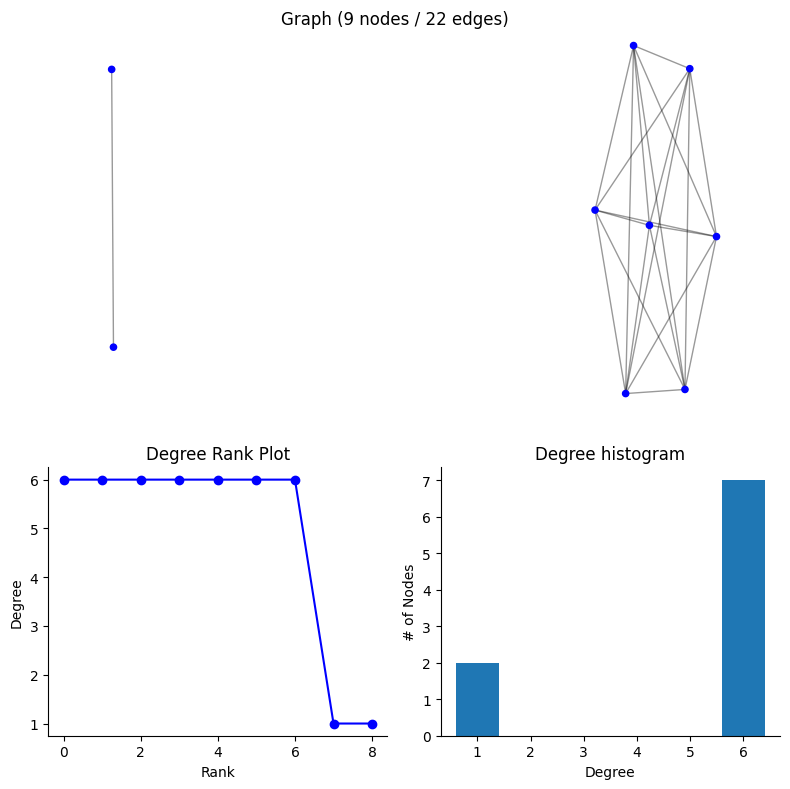

In [8]:
# plot_cluster(
#     clusters[k], full_G, use_recipe=True, savefig="../img/readme_sample_cluster.jpg"
# )
plot_cluster(
    clusters[k], full_G, use_recipe=True, savefig=None
)

In [9]:
write_cluster_cytoscape(clusters[k], full_G, f"{k}_cytoscape.txt")

In [10]:
for p in sorted(clusters[k]["members"] + list(clusters[k]["recipe"]["degree"]["0.75"])):
    # if "GO:0071502" in go_map[p/]:
    print(p)

7227.FBpp0070550
7227.FBpp0072053
7227.FBpp0076643
7227.FBpp0085065
7227.FBpp0086741
7227.FBpp0087361
7227.FBpp0110121
7227.FBpp0291583
7227.FBpp0300610


## Overall ReCIPE Stats

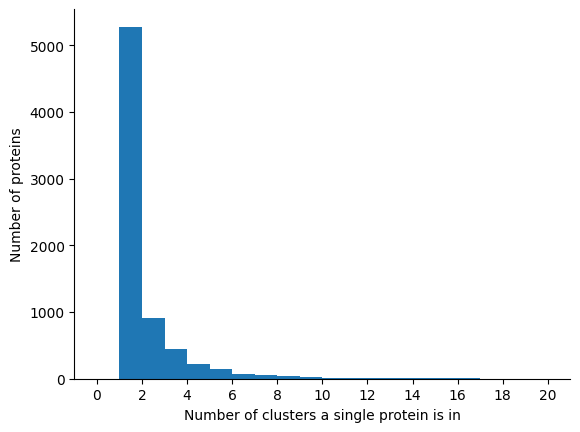

In [70]:
from collections import Counter
node_appearances = list()
for clust in clusters.values():
    for mn in clust["members"]:
        node_appearances.append(mn)
    for rn in clust["recipe"]["degree"]["0.75"]:
        node_appearances.append(rn)
nodes_counter = Counter(node_appearances)
plt.hist(nodes_counter.values(), bins=np.arange(0,21,1))
# xtick labels every 5
plt.xticks(np.arange(0, 21, 2))
plt.xlabel("Number of clusters a single protein is in")
plt.ylabel("Number of proteins")
sns.despine()
plt.savefig(IMG_DIR / "protein_number_of_clusters.png", bbox_inches="tight", dpi=300)
plt.show()